In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\Users\sneha\Downloads\kc_house_data.csv")  # Replace with the actual file path-

In [19]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
target = 'price'

data = data[features + [target]].dropna() 

In [21]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Predictions
y_pred = rf.predict(X_test)

In [27]:
# Evaluating model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 73404.88117682275
Mean Squared Error (MSE): 22912920436.489994
R^2 Score: 0.8484361771437401


In [29]:
# Feature Importance
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

Feature Importances:
grade            0.314318
sqft_living      0.274526
lat              0.153455
long             0.063948
yr_built         0.033623
waterfront       0.031828
sqft_living15    0.031649
sqft_above       0.019595
zipcode          0.014908
sqft_lot         0.014016
sqft_lot15       0.012505
bathrooms        0.011650
view             0.010288
sqft_basement    0.006209
bedrooms         0.003186
yr_renovated     0.002253
floors           0.002042
dtype: float64


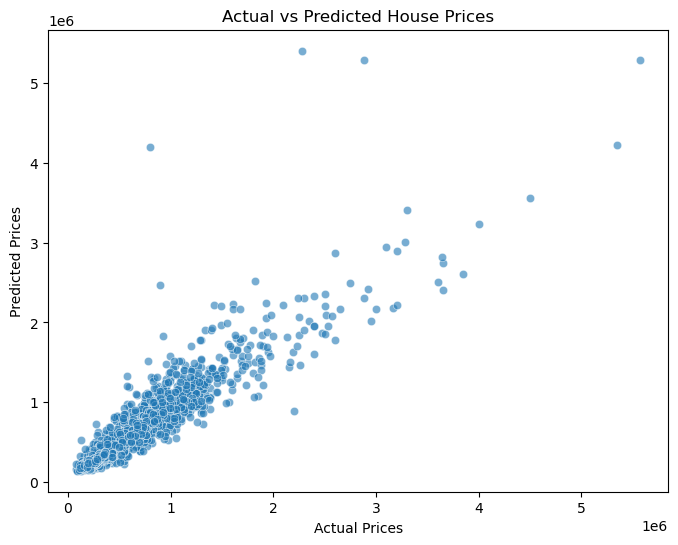

In [31]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()